<a href="https://colab.research.google.com/github/Angel-David-Lozano/Classifier-Colab/blob/main/CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [3]:
import os

if not os.path.isdir("CLASSIFIER"):
  os.makedirs("CLASSIFIER")
  %cd CLASSIFIER


In [ ]:
! cp kaggle.json ~/.kaggle/ #### Descarga de images desde Kaggle a Google Drive

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ashishsaxena2209/animal-image-datasetdog-cat-and-panda 

 97% 363M/376M [00:03<00:00, 163MB/s]
100% 376M/376M [00:03<00:00, 115MB/s]


In [ ]:
!unzip animal-image-datasetdog-cat-and-panda ## Descomprimir archivos

In [ ]:
!pip install split-folders ### Instalacion de libreria para separar carpetas en training, validation, test

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

In [9]:
%cd                                      
%cd /content/gdrive/MyDrive/CLASSIFIER    


/root
/content/gdrive/MyDrive/CLASSIFIER


In [ ]:
input_folder = "kaggle/animals/animals"   ##Carpeta donde estan las images
output_folder = "data"                    ##Carpeta en donde se separa images (train, val, test)

In [ ]:
splitfolders.ratio(input_folder, output_folder, ratio=(.7, .2, .1))   ##Separicion de images

Copying files: 3000 files [00:38, 78.86 files/s]


In [4]:
!pip install tensorflow-gpu               ##Instalacion de tensorflow con soporte de tarjeta grafica

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 1.7 MB 68.0 MB/s 
     |████████████████████████████████| 6.0 MB 59.1 MB/s 
     |████████████████████████████████| 439 kB 91.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Dense

from matplotlib import pyplot as plt  
import cv2
import numpy as np

In [81]:
train_path = "data/train"       ##/content/gdrive/MyDrive/CLASSIFIER/data/train
val_path = "data/val"
test_path = "data/test"

In [82]:
trainData = tf.keras.utils.image_dataset_from_directory(
    train_path,
    batch_size= 32,
    image_size= (224, 224),
    shuffle=True,
    seed=12345
)                             ##Crea a tf.data.Dataset con images de carpetas

Found 2100 files belonging to 3 classes.


In [31]:
data_iteractor = trainData.as_numpy_iterator().next()

In [46]:
data_iteractor[0]              ##([[.............]],[y])     Donde x son imagenes mientras y son classes 

array([[[[9.92652664e+01, 9.79072037e+01, 6.49099579e+01],
         [1.20273598e+02, 1.22768097e+02, 9.35654907e+01],
         [1.26023979e+02, 1.35265045e+02, 1.08506126e+02],
         ...,
         [7.46785889e+01, 8.27589417e+01, 9.32768250e+01],
         [7.58990326e+01, 8.38990326e+01, 9.68990326e+01],
         [7.47446136e+01, 8.27446136e+01, 9.57446136e+01]],

        [[1.17290459e+02, 1.17534279e+02, 8.59137421e+01],
         [1.22104034e+02, 1.26809395e+02, 9.66531372e+01],
         [7.02916031e+01, 8.04526825e+01, 5.36930389e+01],
         ...,
         [7.46748428e+01, 8.27551956e+01, 9.32730789e+01],
         [7.49955368e+01, 8.29955368e+01, 9.59955368e+01],
         [7.53839417e+01, 8.33839417e+01, 9.63839417e+01]],

        [[1.16501831e+02, 1.20282967e+02, 8.83410034e+01],
         [9.42341385e+01, 1.02278778e+02, 7.12293167e+01],
         [7.16300659e+01, 8.37851181e+01, 5.62455368e+01],
         ...,
         [7.38392944e+01, 8.19196472e+01, 9.24375305e+01],
         [

In [83]:
valData = tf.keras.utils.image_dataset_from_directory(
    val_path,
    batch_size= 32,
    image_size= (224, 224),
    shuffle=True,
    seed=12345
)

Found 600 files belonging to 3 classes.


In [106]:
testData = tf.keras.utils.image_dataset_from_directory(
    test_path,
    batch_size= 32,
    image_size= (224, 224),
    shuffle=True,
    seed=12345
)

Found 300 files belonging to 3 classes.


In [67]:
def plotDataSample(dataset, num_col=4, num_row=4):            ##Crea una "funcion" para vizualozacion de images
    plt.figure(figsize=(10,10))
    for images, labels in trainData.take(1):
        for i in range(num_col*num_row):
            ax = plt.subplot(num_col, num_row, i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(dataset.class_names[labels[i]])
            plt.axis("off")        
    plt.show()

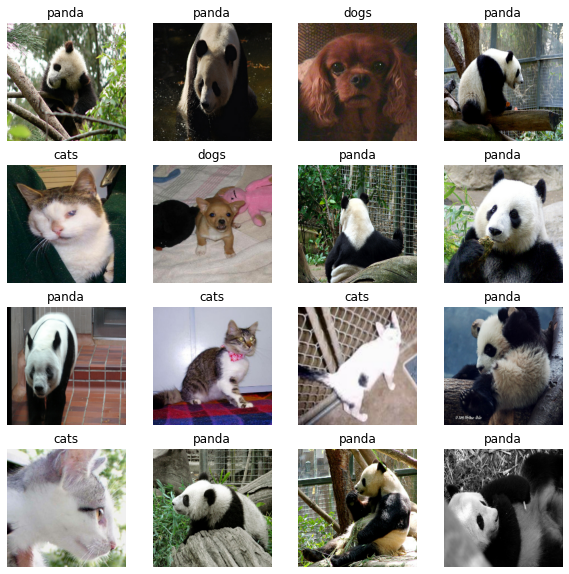

In [68]:
plotDataSample(trainData)               ##Ejecuta "funcion" creada

In [85]:
trainData = trainData.map(lambda x,y: (x/255.0,y))    ##Normalizacion de los valores de los pixeles (valores de 0 a 1)


In [86]:
valData = valData.map(lambda x,y: (x/255.0,y))

In [87]:
testData = testData.map(lambda x,y: (x/255.0,y))

In [88]:
inputImage = Input(shape=(224, 224, 3))                                        ##Debido al modelo VGG16, las images tienen que ser 224x224
model = VGG16(input_tensor=inputImage, include_top=True, weights="imagenet")   ##Descarga el modelo VGG16 
lastLayer = model.get_layer("fc2").output                                      ##"fc2" nombre del ultimo layers (Classificacion)
output = Dense(3, activation="softmax", name="output")(lastLayer)              ##Configuracion del layer output (numero de classes)
customVGG16 = Model(inputImage, output)                                        ##Declara input y output layers del modelo

for layer in customVGG16.layers[:-1]:                                           ##Congela todos los layers excepto el ultimo
    layer.trainable = False

In [89]:
model.summary()                   ##Muestra detalles de la red neuronal

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [90]:
saveModel = ModelCheckpoint("cat,dog,panda.h5", monitor="val_accuracy", save_best_only=True)    ##Guarda cada vez q el modelo mejora

In [91]:
earlyStop = EarlyStopping(monitor="val_accuracy", patience=20)                  ##Para el entrenamiento en caso de que le modelo no mejore  

In [92]:
customVGG16.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)                                                         ##Compila el modelo. Importante declarar optimazer, loss, metrics

In [93]:
history = customVGG16.fit(trainData, validation_data=valData, epochs=1000, callbacks=[saveModel, earlyStop]) ## Ejecuta el entrenamiento

Epoch 1/1000
66/66 [==============================] - 6s 78ms/step - loss: 0.9403 - accuracy: 0.5819 - val_loss: 0.7507 - val_accuracy: 0.6700
Epoch 2/1000
66/66 [==============================] - 4s 54ms/step - loss: 0.5905 - accuracy: 0.7657 - val_loss: 0.6003 - val_accuracy: 0.7800
Epoch 3/1000
66/66 [==============================] - 5s 55ms/step - loss: 0.4990 - accuracy: 0.8162 - val_loss: 0.4603 - val_accuracy: 0.8400
Epoch 4/1000
66/66 [==============================] - 4s 37ms/step - loss: 0.4363 - accuracy: 0.8452 - val_loss: 0.5211 - val_accuracy: 0.7717
Epoch 5/1000
66/66 [==============================] - 4s 59ms/step - loss: 0.4169 - accuracy: 0.8495 - val_loss: 0.4062 - val_accuracy: 0.8483
Epoch 6/1000
66/66 [==============================] - 4s 56ms/step - loss: 0.3730 - accuracy: 0.8600 - val_loss: 0.3832 - val_accuracy: 0.8633
Epoch 7/1000
66/66 [==============================] - 3s 37ms/step - loss: 0.3752 - accuracy: 0.8562 - val_loss: 0.3799 - val_accuracy: 0.8550

In [94]:
customVGG16.evaluate(testData)      ##Evalua el modelo con imagenes nunca vistas por el modelo

10/10 [==============================] - 9s 144ms/step - loss: 0.2274 - accuracy: 0.9133


[0.22739778459072113, 0.9133333563804626]

In [95]:
def historyPlots(model_history):       ##"Funcion" para vizualicion del progreso del entrenamiento 
  plt.subplot(1,2,1)
  plt.plot(model_history.history['loss'], label='loss')
  plt.plot(model_history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc= "upper right")
  plt.subplot(1,2,2)
  plt.plot(model_history.history['accuracy'], label='accuracy')
  plt.plot(model_history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt. tight_layout()
  plt.show()

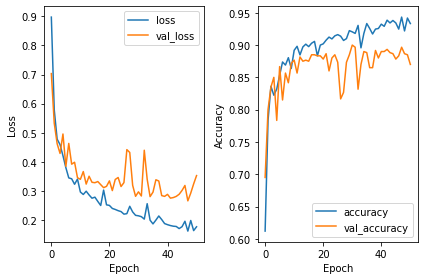

In [ ]:
historyPlots(history)               ##Ejecuta funcion hystoryPLots

In [103]:
my_model = load_model("cat,dog,panda.h5")

In [157]:
def plotPredictedImages(dataset_pre, col=4, row=4):            ##Crea una "funcion" para vizualizacion de images
    plt.figure(figsize=(10,10))
    for images, labels in dataset_pre.take(1):
        predictions = my_model.predict(images)
        for i in range(col*row):
            label = dataset_pre.class_names[np.argmax(predictions[i])]
            conf = int(max(predictions[i])*100)    
            ax = plt.subplot(col, row, i+1)
            plt.imshow(images[i].numpy().astype("uint8"))      
            plt.title(label + " " + str(conf) +"%")
            plt.axis("off")       
    plt.show()

1/1 [==============================] - 0s 29ms/step


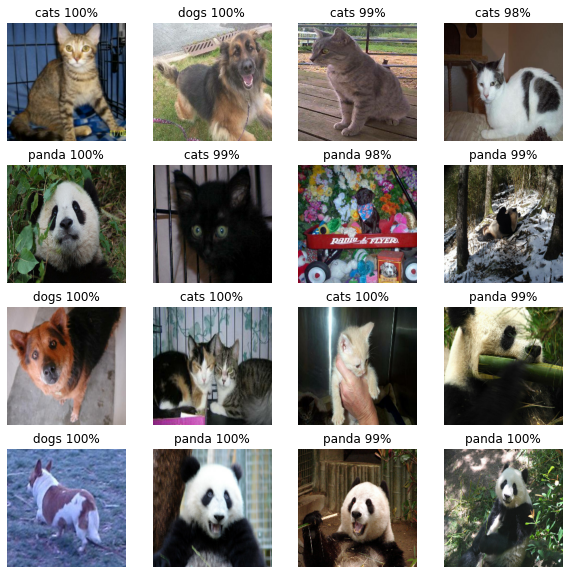

In [158]:
plotPredictedImages(testData)                               ##Ejecuta funcion plotPredictedImages

In [173]:
all_layers = my_model.layers
filters, biases = my_model.layers[1].get_weights()
print(all_layers[1].name, filters.shape)

block1_conv1 (3, 3, 3, 64)


In [175]:
def plotFilters(model, layer_num=1, fig_col=8, fig_row=8):          ##Filtros usados en convolucion
  fig = plt.figure(figsize=(12,12))
  filters, biases = model.layers[layer_num].get_weights()
  for i in range(1, fig_col*fig_row +1):
    f = filters[:, :, :, i-1]
    plt. subplot(fig_row, fig_col, i)
    plt.imshow(f[:,:,0])
  plt.show()


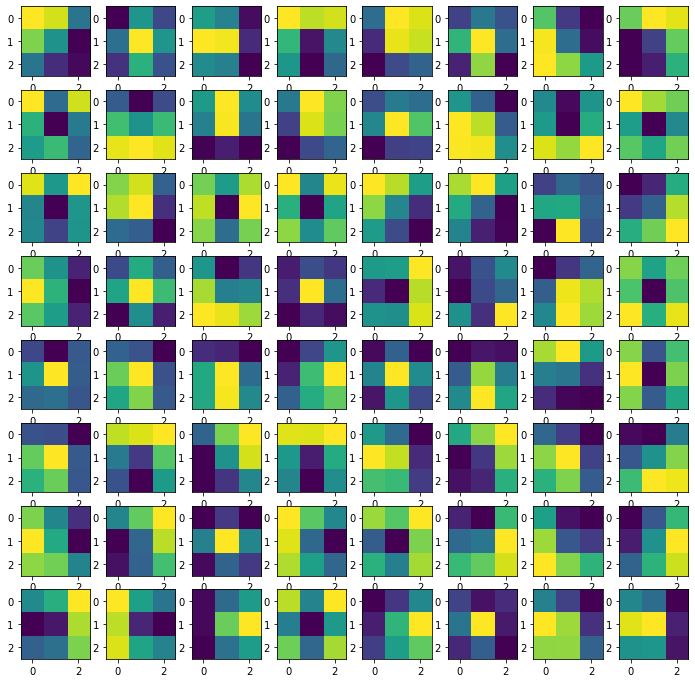

In [229]:
plotFilters(my_model, layer_num=1)

In [185]:
con_lay_index = [1,2]                                                 ##Crea un modelo con solo las primeras capas
outputs = [my_model.layers[i].output for i in con_lay_index]
short_model = Model(inputs=my_model.inputs, outputs=outputs)
short_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
Total params: 38,720
Trainable params: 0
Non-trainable params: 38,720
_________________________________________________________________


In [193]:
from tensorflow.keras.utils import img_to_array, load_img

In [200]:
def loadOneImage(image, size=(224,224)):                  ##Preprocesa una imagen 
  img = load_img(image, target_size=size)
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)

  return img

In [226]:
def plotFilterEffect(features,col_fig=8, row_fig=8):
  for ftr in features:
    plt.figure(figsize=(12,12))
    for i in range (1, col_fig*row_fig+1):
      plt.subplot(col_fig, row_fig, i)
      plt.imshow(ftr[:,:,i-1], cmap="gray")       ##ftr[0,:, :, i-1]
      plt.axis('off')
    plt.show()



In [201]:
image = loadOneImage("cats_00013.jpg")
feature_output = short_model.predict(image)

1/1 [==============================] - 0s 21ms/step


In [224]:
feature_output[0].shape

(1, 224, 224, 64)

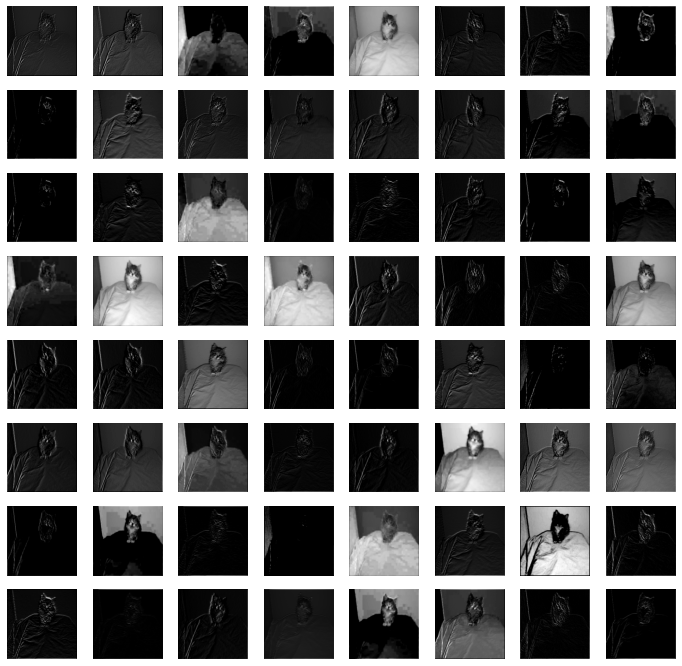

In [231]:
plotFilterEffect(feature_output[1])